Importing Dependencies

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [21]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [22]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [23]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [25]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [26]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [27]:
# checking for missing values
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [28]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [29]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

,count
label,
1,357
0,212


1 --> Benign

0 --> Malignant

In [30]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [31]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [32]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [33]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Splitting the data into training data & Testing data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)



Standardize the data

In [37]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

Building the Nural Network

In [74]:
# Importing Libraries
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras

In [97]:
# Setting the layers of nural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30, )), # 30--> number of input featurs
    keras.layers.Dense(21, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid') # 2 --> number of outputs.
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [98]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
# Training the NN
history= model.fit(X_train_std, Y_train,validation_split=0.1 ,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8038 - loss: 0.4729 - val_accuracy: 0.8478 - val_loss: 0.3491
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8965 - loss: 0.3183 - val_accuracy: 0.8913 - val_loss: 0.2548
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9077 - loss: 0.2492 - val_accuracy: 0.8913 - val_loss: 0.2059
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9222 - loss: 0.2122 - val_accuracy: 0.8913 - val_loss: 0.1760
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9330 - loss: 0.1883 - val_accuracy: 0.8913 - val_loss: 0.1554
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9362 - loss: 0.1707 - val_accuracy: 0.8913 - val_loss: 0.1399
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9403 - loss: 0.1569 - val_accuracy: 0.9348 - val_loss: 0.1277
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9479 - loss: 0.1455 - val_accuracy: 0.9565 - val_los

Visualizing Accuracy and loss

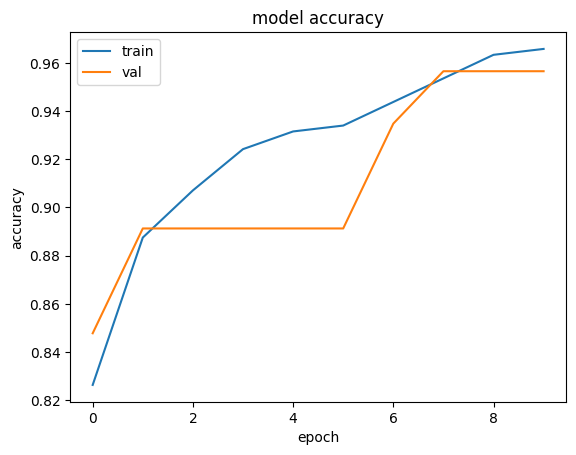

In [100]:
# ploting graph of history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

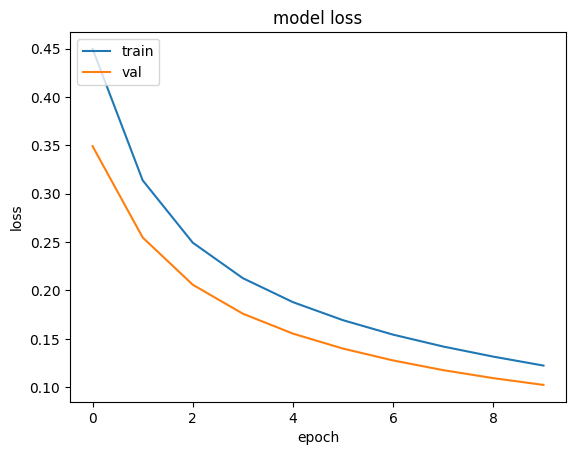

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [102]:
# Accuracy of the model on test data
test_loss, test_acc = model.evaluate(X_test_std, Y_test)
print('Test Data Accuracy: ',test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9529 - loss: 0.1311
Test Data Accuracy:  0.9473684430122375


Making a prediction

In [104]:
print(X_test.shape)
print(X_test.iloc[0])


(114, 30)
mean radius                 13.940000
mean texture                13.170000
mean perimeter              90.310000
mean area                  594.200000
mean smoothness              0.124800
mean compactness             0.097550
mean concavity               0.101000
mean concave points          0.066150
mean symmetry                0.197600
mean fractal dimension       0.064570
radius error                 0.546100
texture error                2.635000
perimeter error              4.091000
area error                  44.740000
smoothness error             0.010040
compactness error            0.032470
concavity error              0.047630
concave points error         0.028530
symmetry error               0.017150
fractal dimension error      0.005528
worst radius                14.620000
worst texture               15.380000
worst perimeter             94.520000
worst area                 653.300000
worst smoothness             0.139400
worst compactness            0.136400
wo

In [105]:
y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [106]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.24699047 0.7410645 ]


Model prediction for each data point

In [107]:
print(y_pred)

[[2.46990472e-01 7.41064489e-01]
 [3.58380735e-01 6.91751003e-01]
 [6.74343780e-02 9.84539807e-01]
 [9.98845756e-01 7.61982927e-04]
 [4.47153211e-01 5.48437297e-01]
 [9.80500996e-01 2.54424699e-02]
 [3.44624847e-01 8.63280535e-01]
 [4.17777002e-02 9.57434714e-01]
 [1.02502055e-01 9.30543900e-01]
 [6.88059554e-02 8.53417158e-01]
 [5.86612225e-01 4.03778017e-01]
 [2.76611328e-01 8.08754027e-01]
 [1.14713900e-01 8.61850321e-01]
 [1.68375731e-01 8.64552975e-01]
 [6.45888224e-02 9.17732775e-01]
 [7.47162879e-01 9.31716040e-02]
 [7.16328323e-02 9.31374252e-01]
 [1.96632609e-01 9.05084789e-01]
 [3.02871596e-02 9.52216685e-01]
 [9.49684858e-01 6.55983910e-02]
 [7.61744261e-01 6.56614542e-01]
 [8.35880190e-02 9.26016629e-01]
 [2.25426763e-01 9.09721673e-01]
 [4.98074181e-02 9.07527506e-01]
 [1.89507708e-01 6.31782711e-01]
 [9.02657390e-01 1.14347160e-01]
 [2.46170714e-01 7.62802780e-01]
 [2.42955744e-01 7.05771446e-01]
 [8.67252171e-01 1.79112807e-01]
 [8.96069527e-01 1.06019996e-01]
 [1.262204

In [111]:
# Converting the prediction probabiity to class lable
Y_pred = np.argmax(y_pred, axis=1)
print(Y_pred)

[1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 1 0]


Building the predictive System

In [118]:
input_data= (13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.342,1.17,14.16,0.004352,0.004899,0.01343,0.01164,0.02671,0.001777,13.3,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169)
# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standarizing the input data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

prediction_lable= np.argmax(prediction, axis=1)
print(prediction_lable)

if (prediction_lable[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.10627425 0.93160105]]
[1]
The Breast Cancer is Benign
